## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!'

In [40]:
# prompt: can you read my GSS.xlsx file to a dataframe from my google drive'

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Replace 'Your_File_Path' with the actual path to your GSS.xlsx file in your Google Drive
file_path = '/content/drive/MyDrive/DS 3001/GSS.xlsx'

try:
    df = pd.read_excel(file_path)
    print("Successfully read the Excel file into a DataFrame.")
    # Now you can work with the DataFrame 'df'
    print(df.head()) # Display the first few rows of the DataFrame
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Successfully read the Excel file into a DataFrame.
   year  id_               hrs2          happy               obey  \
0  1972    1  .i:  Inapplicable  Not too happy  .i:  Inapplicable   
1  1972    2  .i:  Inapplicable  Not too happy  .i:  Inapplicable   
2  1972    3  .i:  Inapplicable   Pretty happy  .i:  Inapplicable   
3  1972    4  .i:  Inapplicable  Not too happy  .i:  Inapplicable   
4  1972    5  .i:  Inapplicable   Pretty happy  .i:  Inapplicable   

             popular           thnkself           workhard            helpoth  \
0  .i:  Inapplicable  .i:  Inapplicable  .i:  Inapplicable  .i:  Inapplicable   
1  .i:  Inapplicable  .i:  Inapplicable  .i:  Inapplicable  .i:  Inapplicable   
2  .i:  Inapplicable  .i:  Inapplicable  .i:  Inapplicable  .i:  Inapplicable   
3  .i:  Inapplicable  .i:  Inapplicable  .i:  Inapplicable  .i:  Inapplicable   


Nummerical Summaries

                satjob                           stress         happy
count            72390                            72390         72390
unique               8                               10             7
top     Very satisfied  .y:  Not available in this year  Pretty happy
freq             24718                            38584         37813
['A little dissatisfied' '.i:  Inapplicable' 'Moderately satisfied'
 'Very satisfied' 'Very dissatisfied' '.n:  No answer'
 '.d:  Do not Know/Cannot Choose' '.s:  Skipped on Web']
['.y:  Not available in this year' '.i:  Inapplicable' '.n:  No answer'
 'Sometimes' 'Often' 'Hardly ever' '.d:  Do not Know/Cannot Choose'
 'Never' 'Always' '.s:  Skipped on Web']
['Not too happy' 'Pretty happy' 'Very happy' '.n:  No answer'
 '.d:  Do not Know/Cannot Choose' '.i:  Inapplicable'
 '.s:  Skipped on Web']


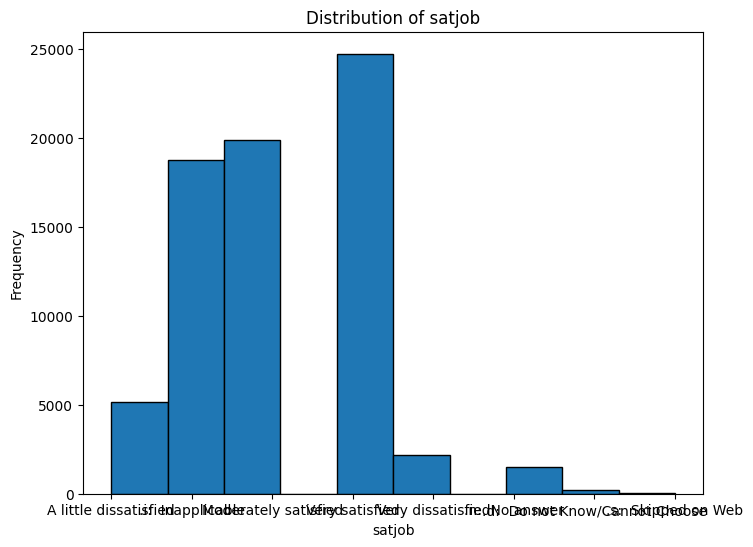

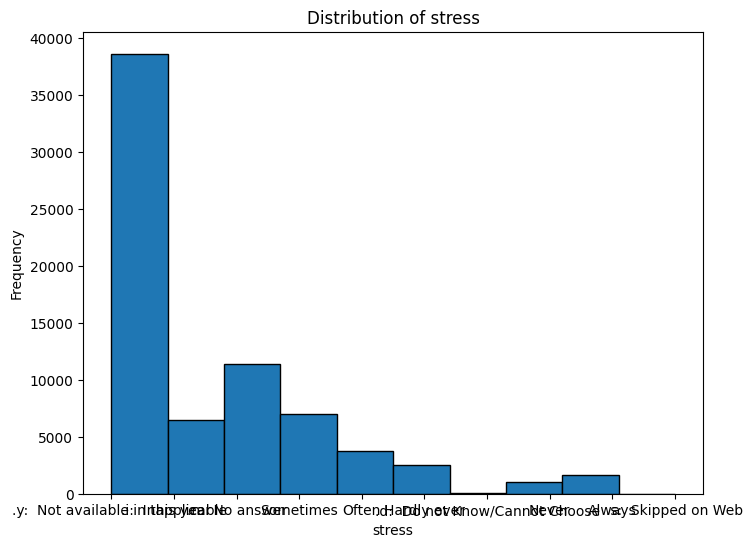

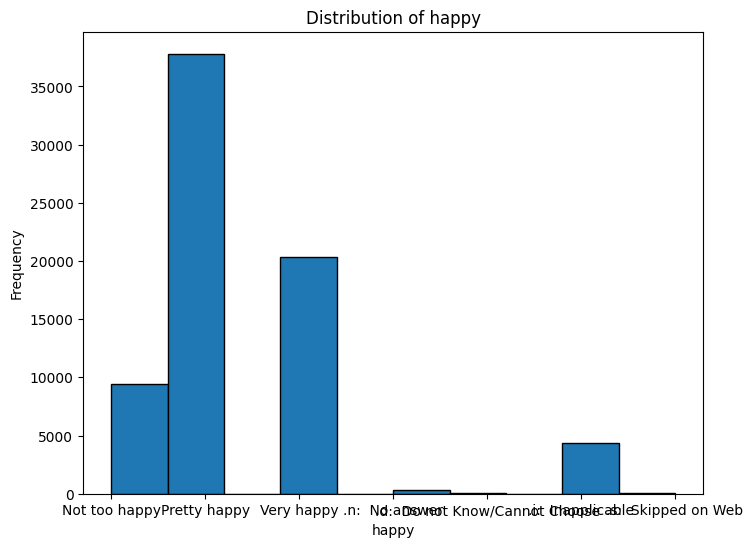

In [41]:
# prompt: Show the mean, median, and distribution of the variables satjob, stress, happy
import pandas as pd
# Display numerical summaries for 'satjob', 'stress', and 'happy'
print(df[['satjob', 'stress', 'happy']].describe())

# Calculate and display the unique values for each column
print(df['satjob'].unique())
print(df['stress'].unique())
print(df['happy'].unique())


# Display the distribution of each variable using histograms (if applicable)
import matplotlib.pyplot as plt

# Loop through each selected variable and create a histogram
for col in ['satjob', 'stress', 'happy']:
  plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
  plt.hist(df[col].dropna(), bins=10, edgecolor='black') # Use dropna() to exclude missing values from the histogram
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()


Through this intial analysis, we see that there is much data cleaning that we need to do. Creating a map to turn the descriptive variables into dummy variables will help us draw conclusions

Convert the values to dummy variables

In [42]:
import pandas as pd
import numpy as np

satjob_mapping = {
    "Very satisfied": 4,
    "Moderately satisfied": 3,
    "A little dissatisfied": 2,
    "Very dissatisfied": 1,
    ".i:  Inapplicable": np.nan,
    ".n:  No answer": np.nan,
    ".d:  Do not Know/Cannot Choose": np.nan,
    ".s:  Skipped on Web": np.nan
}

stress_mapping = {
    "Always": 5,
    "Often": 4,
    "Sometimes": 3,
    "Hardly ever": 2,
    "Never": 1,
    ".i:  Inapplicable": np.nan,
    ".n:  No answer": np.nan,
    ".d:  Do not Know/Cannot Choose": np.nan,
    ".s:  Skipped on Web": np.nan,
    ".y:  Not available in this year": np.nan
}

happy_mapping = {
    "Very happy": 3,
    "Pretty happy": 2,
    "Not too happy": 1,
    ".i:  Inapplicable": np.nan,
    ".n:  No answer": np.nan,
    ".d:  Do not Know/Cannot Choose": np.nan,
    ".s:  Skipped on Web": np.nan
}




In [43]:
print(df["hrs2"].unique())


['.i:  Inapplicable' '40' '55' '15' '56' '50' '10' '35' '.n:  No answer'
 '70' '16' '37' '30' '48' '20' '5' '25' '60' '32' '52' '45'
 '.d:  Do not Know/Cannot Choose' '75' '24' '4' '89+ hrs' '44' '34' '13'
 '8' '12' '6' '80' '39' '21' '47' '36' '38' '33' '46' '42' '43' '11' '66'
 '23' '7' '58' '18' '65' '84' '17' '68' '41' '1' '2' '0' '72' '28' '57'
 '3' '22' '27' '26' '9' '.s:  Skipped on Web']


In [44]:
import pandas as pd
import numpy as np

def clean_work_hours(value):
    if isinstance(value, str):
        if value.startswith((".", "-")):
            return np.nan
        value = value.replace("+", "").replace("hrs", "").replace(".", "").strip()
    try:
        return int(value)
    except ValueError:
        return np.nan




In [45]:
df["satjob_numeric"] = df["satjob"].replace(satjob_mapping)
df["stress_numeric"] = df["stress"].replace(stress_mapping)
df["happy_numeric"] = df["happy"].replace(happy_mapping)
df["work_hours_cleaned"] = df["hrs2"].apply(clean_work_hours)


print(df[["satjob_numeric", "stress_numeric", "happy_numeric", "work_hours_cleaned"]].describe())

       satjob_numeric  stress_numeric  happy_numeric  work_hours_cleaned
count    51887.000000    15879.000000   67588.000000         1401.000000
mean         3.293812        3.149569       2.162677           39.206281
std          0.809827        1.016608       0.643490           13.549101
min          1.000000        1.000000       1.000000            0.000000
25%          3.000000        3.000000       2.000000           35.000000
50%          3.000000        3.000000       2.000000           40.000000
75%          4.000000        4.000000       3.000000           45.000000
max          4.000000        5.000000       3.000000           89.000000


<ipython-input-45-00876b6ada9a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["satjob_numeric"] = df["satjob"].replace(satjob_mapping)
<ipython-input-45-00876b6ada9a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["stress_numeric"] = df["stress"].replace(stress_mapping)
<ipython-input-45-00876b6ada9a>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, s

Analyzing the mean and medians does take some knowledge of the mapping. Job satisfaction has a median of "moderatly satisfied", with a mean just above that. How stressful the work is has a median of "sometimes", with a mean just above that. Happiness has a median of "pretty happy", with a mean just above that. The median and mean of hours worked are both around 40

Analyze the distribution

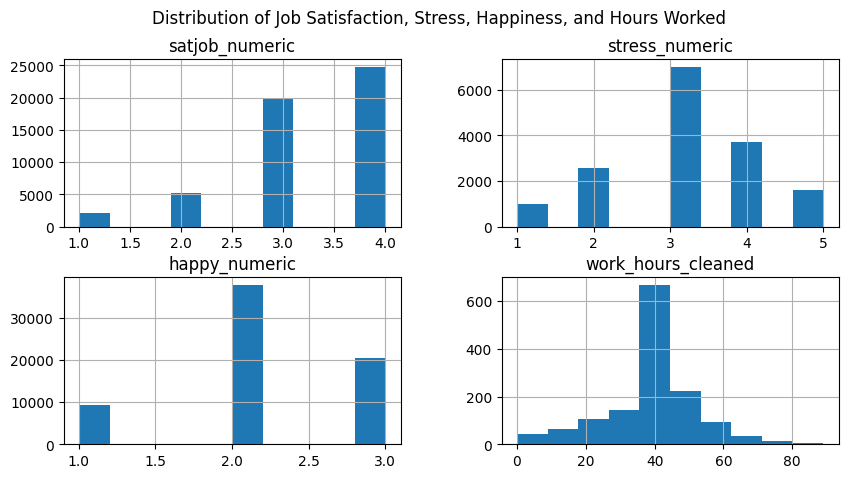

In [46]:
import matplotlib.pyplot as plt

df[["satjob_numeric", "stress_numeric", "happy_numeric", "work_hours_cleaned"]].hist(bins=10, figsize=(10, 5))
plt.suptitle("Distribution of Job Satisfaction, Stress, Happiness, and Hours Worked")
plt.show()


Correlation between values

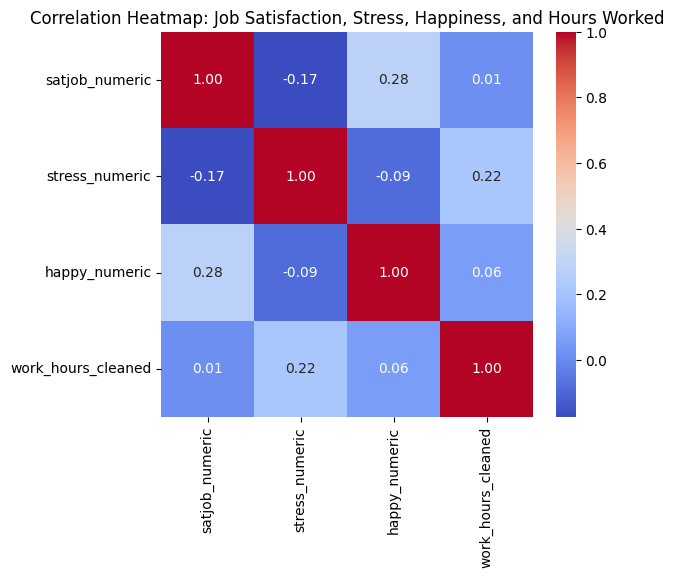

In [47]:
import seaborn as sns
plt.figure(figsize=(6,5))
sns.heatmap(df[["satjob_numeric", "stress_numeric", "happy_numeric", "work_hours_cleaned" ]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Job Satisfaction, Stress, Happiness, and Hours Worked")
plt.show()


As we can see from this heatmap, the values are not as correlated as anticipated. The most correlated relationship is the positive relationship between happiness an job statisfaction. The least correlated is the relationship between job satisfaction and hours worked.

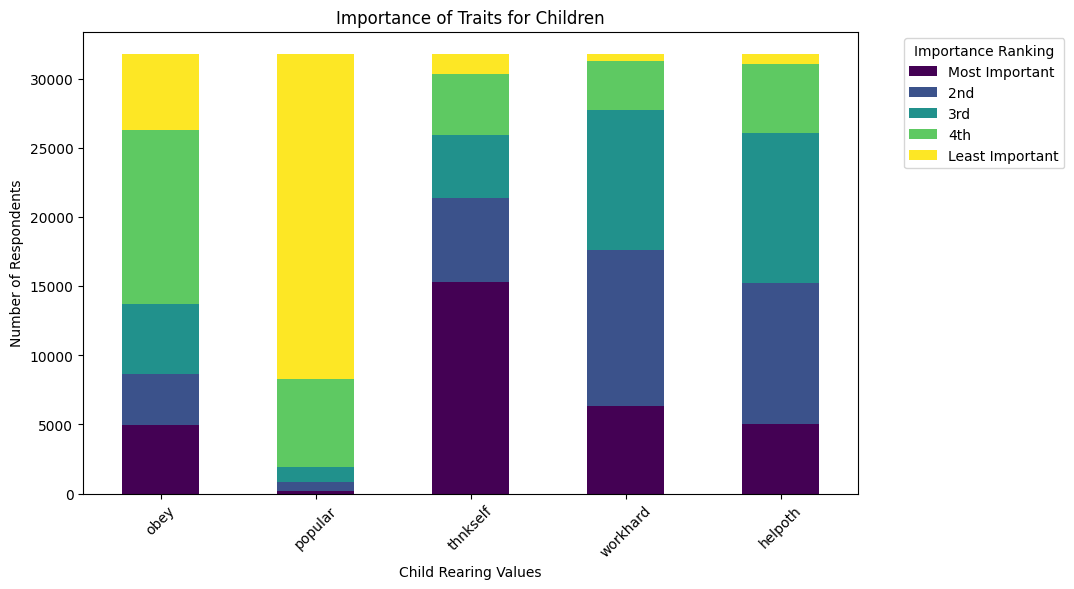

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Mapping categorical rankings to numeric values
importance_mapping = {
    "MOST IMPORTANT": 1,
    "2ND IMPORTANT": 2,
    "3RD IMPORTANT": 3,
    "4TH IMPORTANT": 4,
    "LEAST IMPORTANT": 5,
    ".i:  Inapplicable": None,  # Treat missing values as None (or np.nan)
    ".n:  No answer": None
}

columns = ["obey", "popular", "thnkself", "workhard", "helpoth"]

for col in columns:
    df[col] = df[col].map(importance_mapping)

df_counts = df[columns].apply(pd.Series.value_counts).fillna(0)

df_counts = df_counts.sort_index(ascending=True)

df_counts.T.plot(kind="bar", stacked=True, figsize=(10,6), colormap="viridis")

plt.title("Importance of Traits for Children")
plt.xlabel("Child Rearing Values")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.legend(title="Importance Ranking", labels=["Most Important", "2nd", "3rd", "4th", "Least Important"],
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
